In [1]:
import os,cv2
import sys, random
import numpy as np
import matplotlib.pyplot as plt
import itertools

#sklearn
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,confusion_matrix



## Keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam,adadelta


C:\Users\drimamskom\Anaconda2\envs\opencv36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
Path=os.getcwd() # direktori data
data_path=Path+'/Data-sem' #dua folder(spermatozoa dan non-spermatozoa)
data_dir_list=os.listdir(data_path) # dua folder
img_data_list=[] #menambahkan data ke dalam list
for dataset in data_dir_list:
    if dataset=='.DS_Store':
        pass
    else:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loading dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(64,64))
            img_data_list.append(input_img_resize)


Loading dataset-non-spermatozoa

Loading dataset-spermatozoa



In [3]:
img_rows=64 # tinggi image
img_cols=64 #lebar image
num_channel=1 #dimensi image~ Gray image
num_epoch=10 # jumlah epoh
num_classes=2 #kelas-output

In [4]:
img_data=np.array(img_data_list) #konversi image ke list arrays
img_data=img_data.astype('float32') #konversi data type float
img_data/=255 #normalisasi
print (img_data.shape)

(6026, 64, 64)


In [5]:
if num_channel==1: #untuk 1D (channel=1)
    if K.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1)
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4)
        print (img_data.shape)
else: # for RGB
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data_data,3,1)
        print(img_data.shape)
num_of_samples=img_data.shape[0] # Total data

(6026, 64, 64, 1)


C:\Users\drimamskom\Anaconda2\envs\opencv36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [6]:
labels=np.ones((num_of_samples,),dtype='int64')
labels[3011:6026]=1
labels[0:3010]=0
names=['positive','negative']
Y = np_utils.to_categorical(labels, num_classes)

In [7]:
print(num_of_samples)

6026


In [8]:
x,y = shuffle(img_data,Y, random_state=2)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
input_shape=img_data[0].shape

In [9]:
print(input_shape)

(64, 64, 1)


In [10]:
model = Sequential()

model.add(Convolution2D(32, 7,7,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))

model.add(Convolution2D(32, 7, 7))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 7, 7))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 7, 7))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 64, 64, 32)    1600        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 64, 64, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 58, 58, 32)    50208       activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 58, 58, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

True

In [14]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_split=0.2)


Train on 3856 samples, validate on 964 samples
Epoch 1/10
 112/3856 [..............................] - ETA: 244s - loss: 0.6925 - acc: 0.5000

KeyboardInterrupt: 

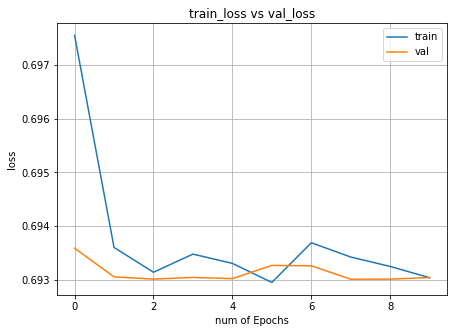

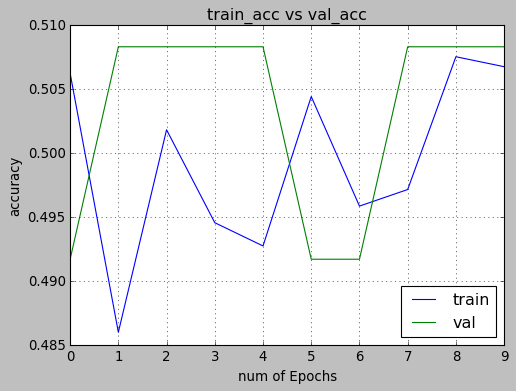

In [15]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.693510602264
Test accuracy: 0.473466003613


In [17]:
test_image = X_test[0:1]
print (test_image.shape)
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

(1, 64, 64, 1)
[[ 0.4967725   0.50322747]]
1/1 [==============================] - 0s
[1]
[[ 1.  0.]]


In [18]:
test_image = cv2.imread('E:/thesis-fix/test/1_3015.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(64,64))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

(64, 64)


In [19]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        test_image= np.expand_dims(test_image, axis=0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=3)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
else:
    if K.image_dim_ordering()=='th':
        test_image=np.rollaxis(test_image,2,0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)


(1, 64, 64, 1)


C:\Users\drimamskom\Anaconda2\envs\opencv36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


In [20]:
print((model.predict(test_image)))
print(model.predict_classes(test_image))


[[ 0.4967725   0.50322747]]
1/1 [==============================] - 0s
[1]


In [21]:
test_image = cv2.imread('E:/thesis-fix/test/0_3016.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(64,64))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

(64, 64)


In [22]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        test_image= np.expand_dims(test_image, axis=0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=3)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
else:
    if K.image_dim_ordering()=='th':
        test_image=np.rollaxis(test_image,2,0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)


(1, 64, 64, 1)


C:\Users\drimamskom\Anaconda2\envs\opencv36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


In [23]:
print((model.predict(test_image)))
print(model.predict_classes(test_image))


[[ 0.4967725   0.50322747]]
1/1 [==============================] - 0s
[1]


(1, 1, 29, 29, 32)
(29, 29, 32)
(29, 29, 32)


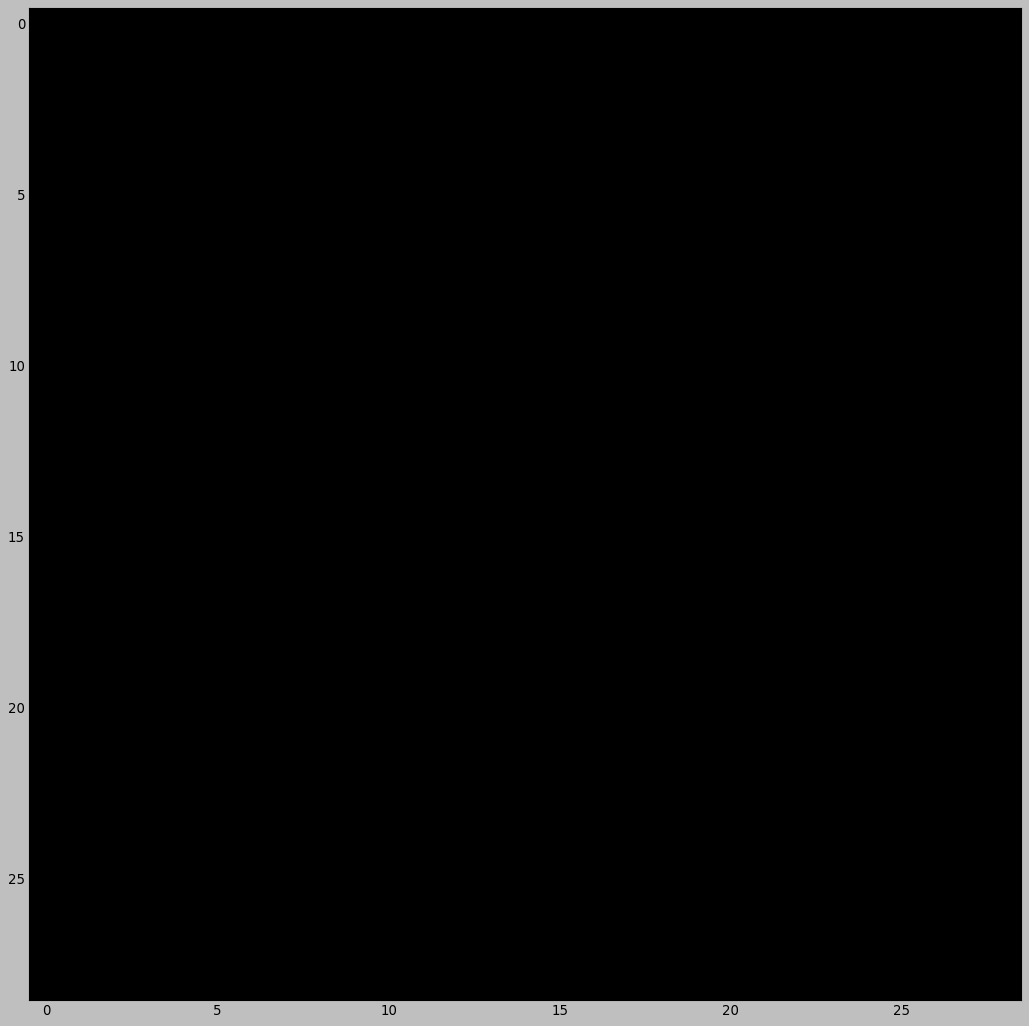

In [24]:
def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

layer_num=4
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)
print (np.shape(activations))
feature_maps = activations[0][0]
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
    feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.show()

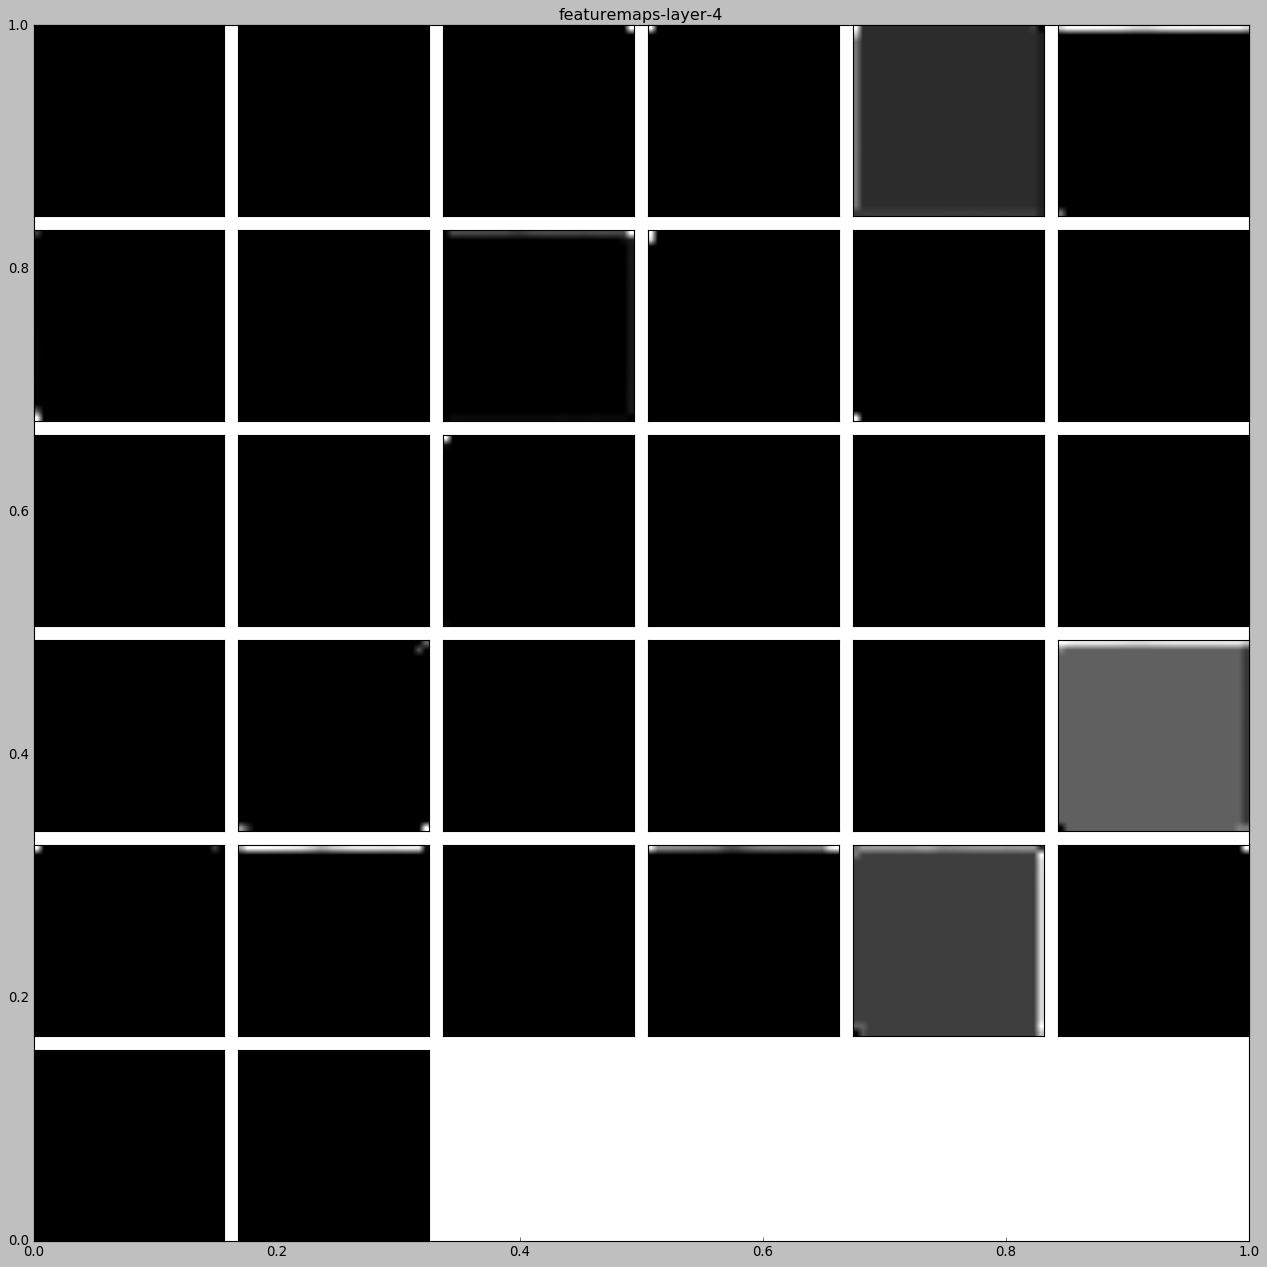

In [25]:
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

In [26]:
Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
target_names = ['class 0(Non-spermatozoa)', 'class 1(Spermatozoa)']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

[[ 0.4967725   0.50322747]
 [ 0.4967725   0.50322747]
 [ 0.4967725   0.50322747]
 ..., 
 [ 0.4967725   0.50322747]
 [ 0.4967725   0.50322747]
 [ 0.4967725   0.50322747]]
[1 1 1 ..., 1 1 1]
                          precision    recall  f1-score   support

class 0(Non-spermatozoa)       0.00      0.00      0.00       635
    class 1(Spermatozoa)       0.47      1.00      0.64       571

             avg / total       0.22      0.47      0.30      1206

[[  0 635]
 [  0 571]]


C:\Users\drimamskom\Anaconda2\envs\opencv36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalisasi confusion matrix")
    else:
        print('Confusion matrix, tanpa normalisasi')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, tanpa normalisasi
[[  0 635]
 [  0 571]]


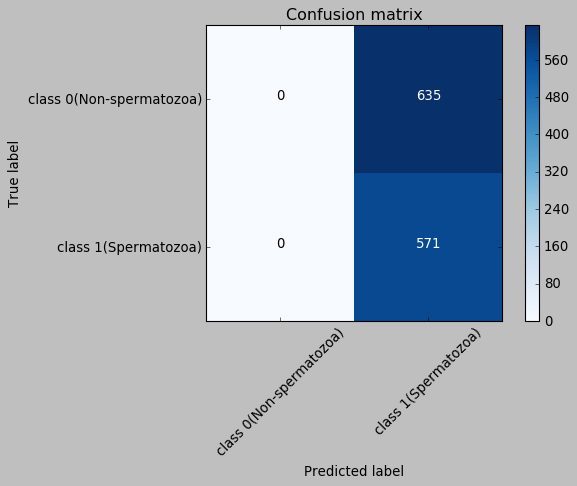

In [28]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im_age=cv2.imread('E:/thesis-fix/test/00211.jpg')
im_age=cv2.cvtColor(im_age, cv2.COLOR_BGR2GRAY)

height=len(im_age[0])
width=len(im_age[1])


In [ ]:
step = 10
AOI_coordinates = []
picture_tensor=[]

image_array = np.array(im_age).astype('uint8')
plt.figure(1, figsize = (15, 30))
plt.imshow(image_array, cmap='gray')
plt.show()

In [ ]:
def clipped(x, y):
    #Area Of Interst (AOI)
    AOI = np.arange(1*64*64).reshape(1, 64, 64)
    for i in range(64):
        for j in range(64):
            AOI[0][i][j] = picture_tensor[0][y+i][x+j] 
            AOI[1][i][j] = picture_tensor[1][y+i][x+j] 
    AOI = AOI.reshape([-1, 1, 64, 64])
    AOI = AOI.transpose([0,1,2,3])
    AOI = AOI / 255
    sys.stdout.write('\rX_coordinate:{0} Y_coordinate:{1}  '.format(x, y))
    return AOI

#to check distance
def dist(x, y, size, coordinates):
    result = True
    for point in coordinates:
        if x+size > point[0][0] and x-size < point[0][0] and y+size > point[0][1] and y-size < point[0][1]:
            result = False
    return result


In [ ]:
print(range(int((height-(64-step))/step)))